In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/WineQT.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [8]:
df.drop("Id", axis = 1, inplace=True)

Text(0, 0.5, 'Count')

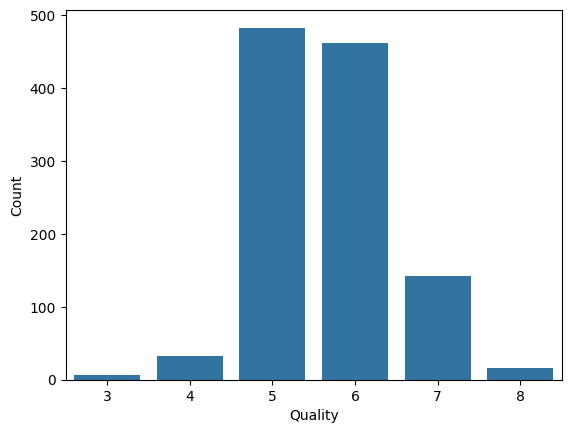

In [7]:
sns.countplot(x = "quality", data = df)
plt.xlabel("Quality")
plt.ylabel("Count")

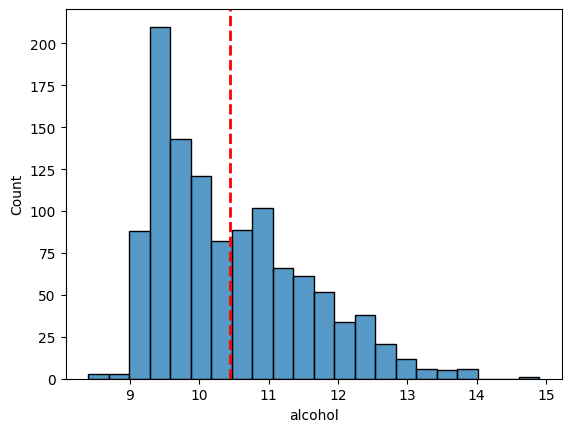

In [10]:
sns.histplot(x = "alcohol", data = df)
plt.axvline(np.mean(df.alcohol), color='red', linestyle='dashed', linewidth=2)

In [13]:
df.query('alcohol > 14')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
462,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.9976,2.98,0.84,14.9,5


In [14]:
df.query('alcohol < 9')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
263,7.9,0.24,0.40,1.6,0.056,11.0,25.0,0.99670,3.32,0.87,8.7,6
368,10.4,0.61,0.49,2.1,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
388,14.3,0.31,0.74,1.8,0.075,6.0,15.0,1.00080,2.86,0.79,8.4,6
1023,10.0,0.38,0.38,1.6,0.169,27.0,90.0,0.99914,3.15,0.65,8.5,5
1051,9.9,0.50,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5
1053,9.9,0.50,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>, <Axes: >, <Axes: >]],
      dtype=object)

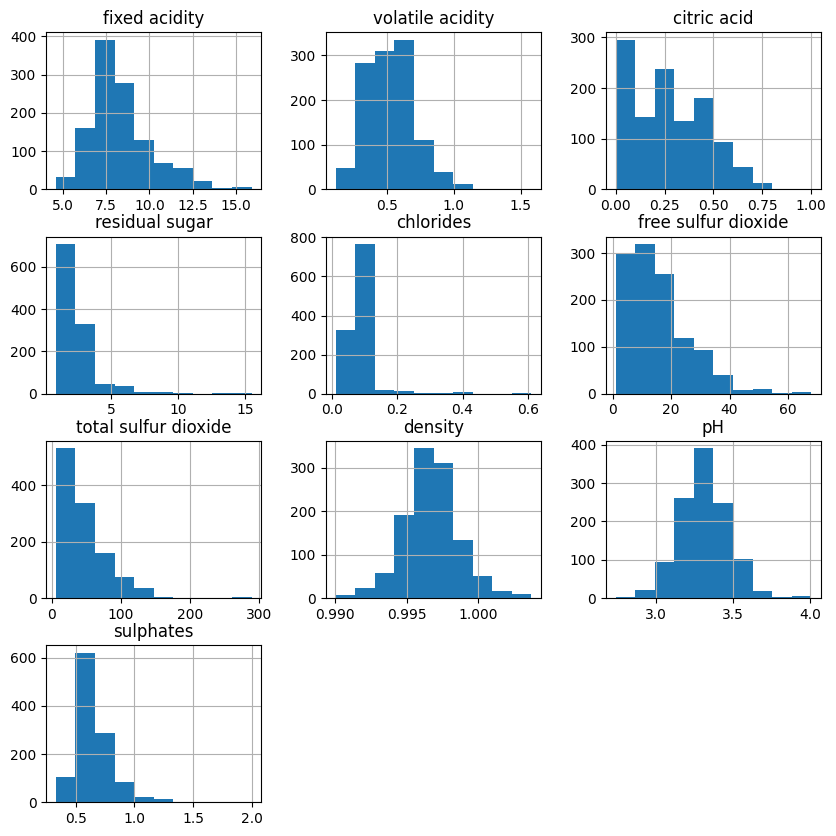

In [17]:
df.drop(['alcohol', 'quality'], axis = 1).hist(figsize=[10,10])

<Axes: xlabel='quality', ylabel='alcohol'>

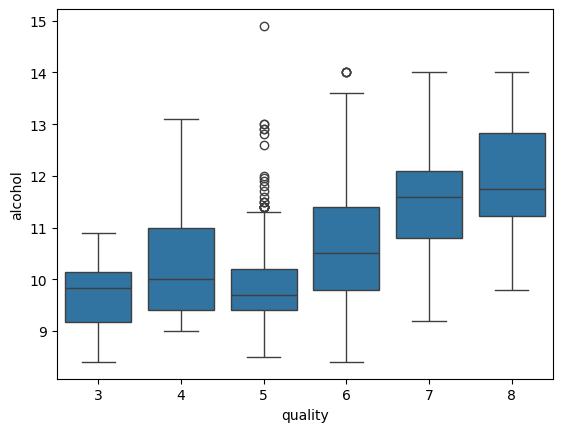

In [21]:
sns.boxplot( x = "quality", y = "alcohol", data = df)

<Axes: xlabel='alcohol', ylabel='quality'>

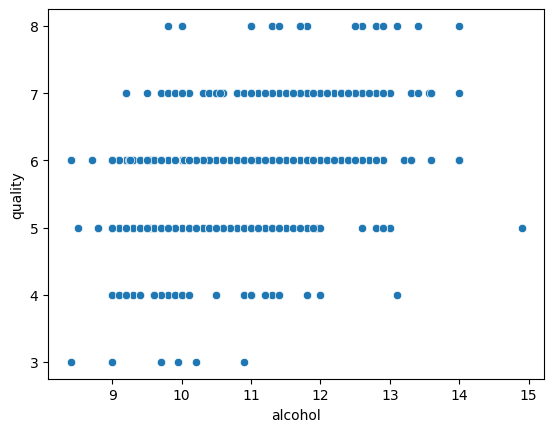

In [41]:
sns.scatterplot(x = "alcohol",y = "quality", data = df)

In [33]:
df.groupby('quality')['alcohol'].mean()

,alcohol
quality,
3,9.691667
4,10.260606
5,9.902277
6,10.655339
7,11.482634
8,11.937500


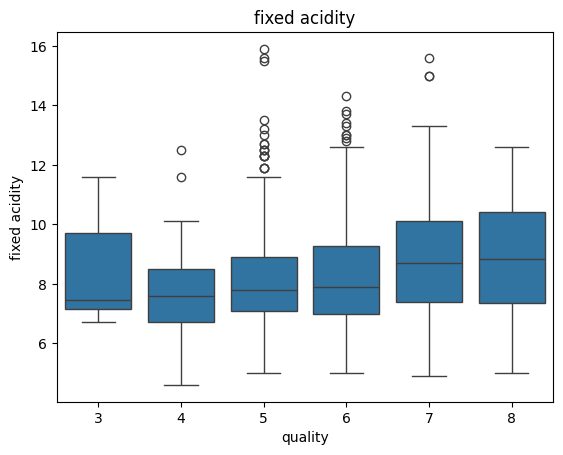

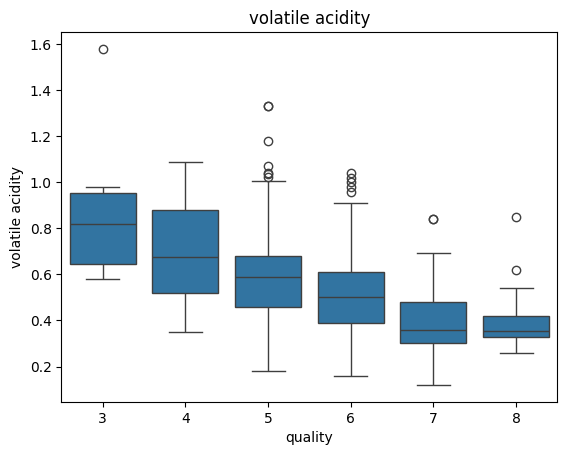

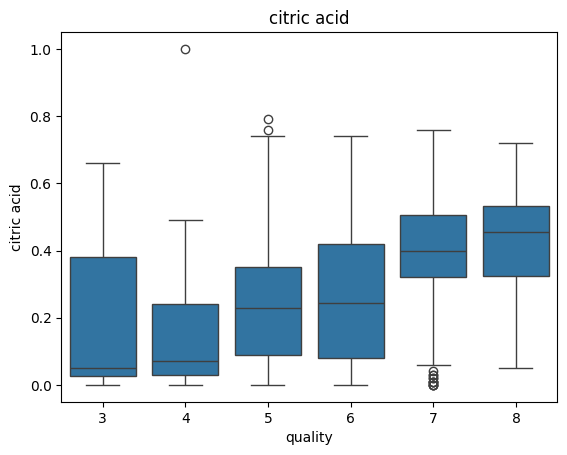

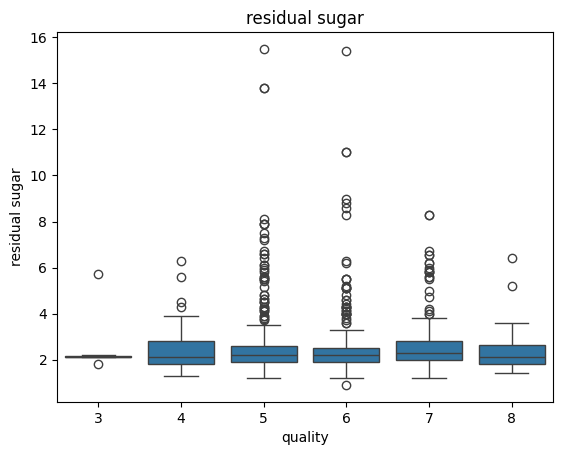

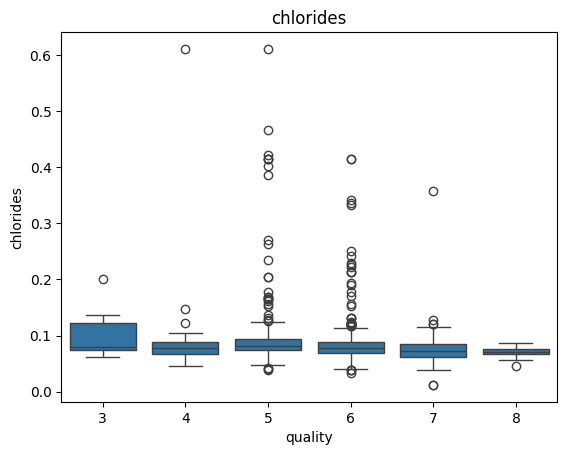

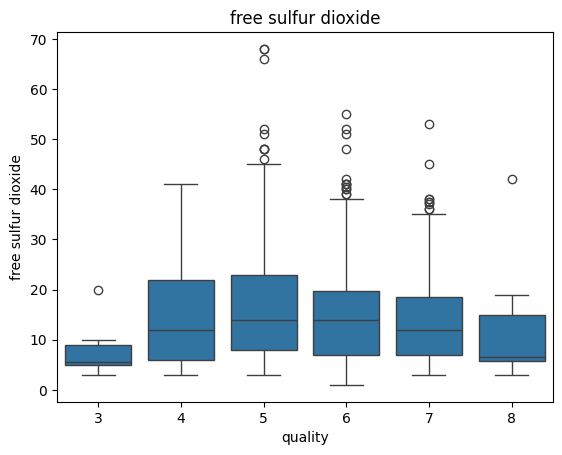

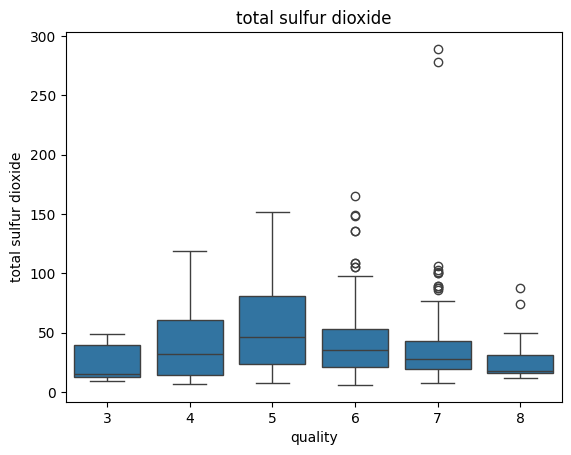

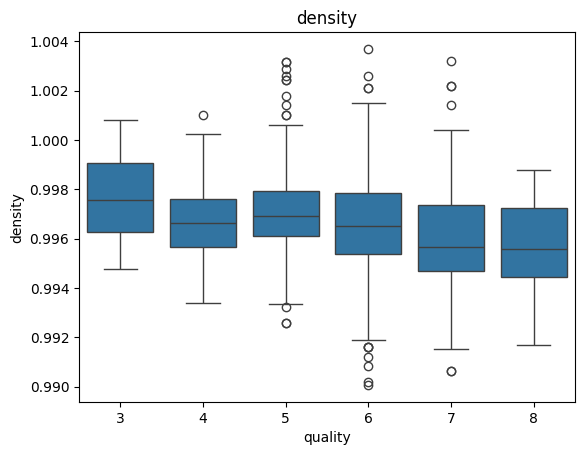

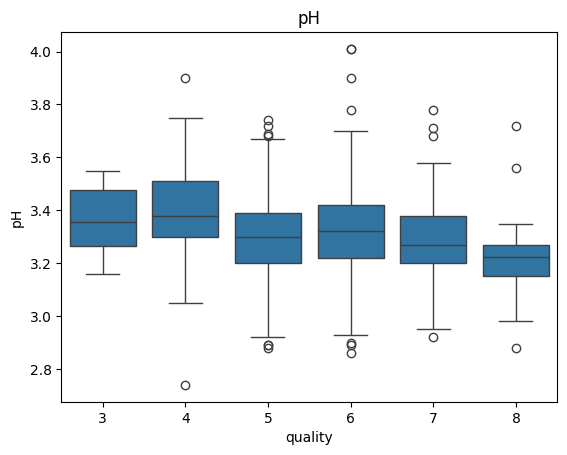

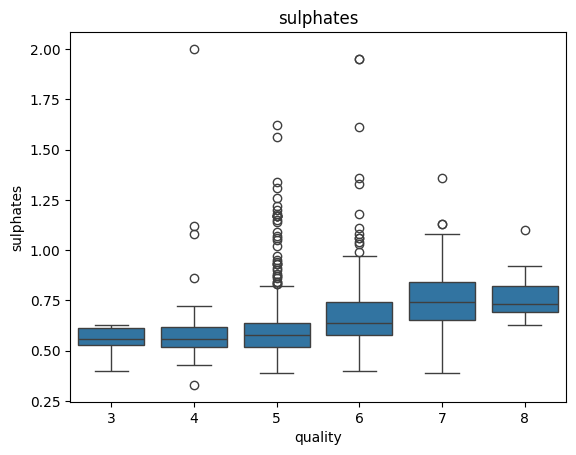

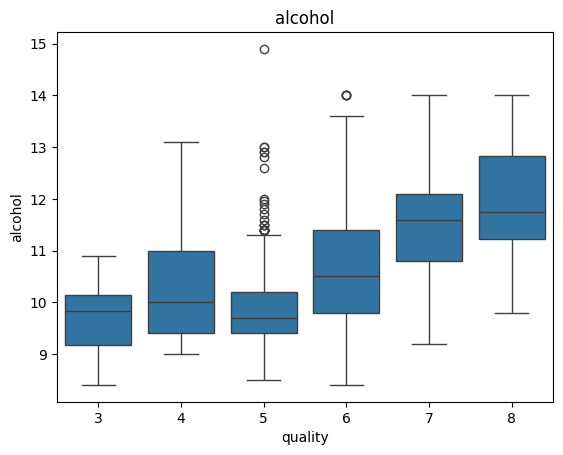

In [32]:
column_list = df.drop('quality', axis = 1).columns

for i in column_list:
  fig, ax = plt.subplots()
  sns.boxplot(y = i, x = "quality", data = df)


<Axes: >

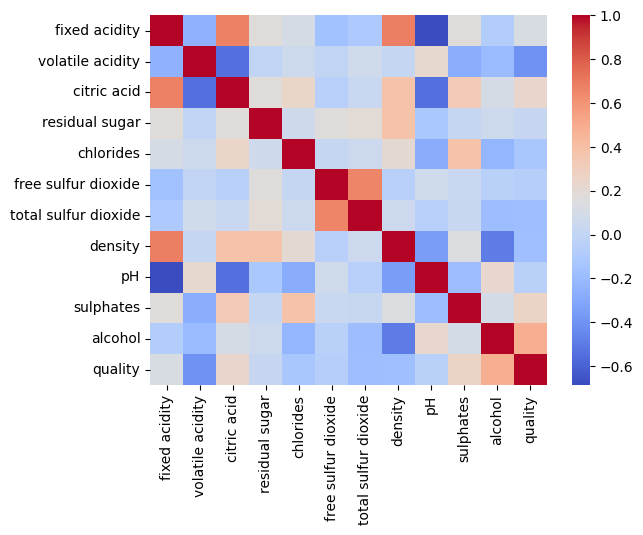

In [25]:
sns.heatmap(df.corr(),
            cmap='coolwarm')

In [45]:
round(df.corrwith(df['quality']).sort_values(), 2)

,0
volatile acidity,-0.41
total sulfur dioxide,-0.18
density,-0.18
chlorides,-0.12
free sulfur dioxide,-0.06
pH,-0.05
residual sugar,0.02
fixed acidity,0.12
citric acid,0.24
sulphates,0.26


In [40]:
Y = df['quality']
X = df['alcohol']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     350.7
Date:                Wed, 19 Nov 2025   Prob (F-statistic):           1.92e-68
Time:                        03:23:13   Log-Likelihood:                -1221.4
No. Observations:                1143   AIC:                             2447.
Df Residuals:                    1141   BIC:                             2457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8870      0.202      9.323      0.000       1.490       2.284
alcohol        0.3610      0.019     18.727      0.000       0.323       0.399
==============================================================================
Omnibus:                       23.902   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.156
Skew:                          -0.047   Prob(JB):                     5.76e-11
Kurtosis:                       3.991   Cond. No.                         103.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""